# Layouts

## Load cuxfilter and data

In [ ]:
from cuxfilter import charts
import cuxfilter
from bokeh import palettes
cux_df = cuxfilter.DataFrame.from_arrow('./data/146M_predictions_v2.arrow')

## Declare charts

In [ ]:
#tile provider for choropleth map
MAPBOX_API_KEY= "pk.eyJ1IjoiYXRob3J2ZSIsImEiOiJjazBmcmlhYzAwYXc2M25wMnE3bGttbzczIn0.JCDQliLc-XTU52iKa8L8-Q"

chart0 = charts.choropleth(x='zip', y='delinquency_12_prediction', color_column='delinquency_12_prediction', color_aggregate_fn='mean',
                                  geo_color_palette=palettes.Purples9, mapbox_api_key=MAPBOX_API_KEY,
                                  geoJSONSource = 'https://raw.githubusercontent.com/rapidsai/cuxfilter/GTC-2018-mortgage-visualization/javascript/demos/GTC%20demo/public/data/zip3-ms-rhs-lessprops.json',
                                  data_points=1000, nan_color='white')
chart1 = charts.bar('dti')
chart2 = charts.bar('delinquency_12_prediction',data_points=50)
chart3 = charts.line('borrower_credit_score', step_size=1)
chart4 = charts.bar('seller_name')
chart5 = charts.scatter(x='loan_id',y='current_actual_upb')
chart6 = charts.line('dti')
chart7 = charts.line('delinquency_12_prediction', data_points=50)
chart8 = charts.bar('borrower_credit_score', step_size=1)
chart_widget = charts.multi_select('dti')

#create a list of charts
charts_list = [chart_widget, chart0, chart3, chart1, chart2, chart4, chart5, chart6, chart7, chart8]

## User-defined Layout Types

#### **Cuxfilter 0.18 introduced custom user-defined layouts, which can be applied using an input parameter to the `.dashboard()` api, called `layout_array`.**

Layout array is a list-of-lists, representing a 2-dimensional layout page. Each list is mapped to an entire row of the layout. A list contains chart numbers (starting from 1 to n), representing their exact position on the page. The input array is automatically scaled to fit the entire screen.

##### **Example 1:**

```python
layout_array = [[1]]
```
will result in a single chart occupying the entire page.

<img src= './layout_thumbnails/single_feature.png' width=350px>


##### **Example 2:**
```python
layout_array = [[1], [1], [2]]
```
will result chart 1 occupying the first two rows and chart 2 occupying the last row, roughly dividing the 2-chart layout to a 66%-33% ration.


<img src= './layout_thumbnails/feature_and_base.png' width=350px>


##### **Example 3:**

In [ ]:
d = cux_df.dashboard(charts_list, layout_array=[
    [1, 1, 2, 2],
    [1, 1, 3, 4]
], theme=cuxfilter.themes.rapids, title="Layout - Custom")

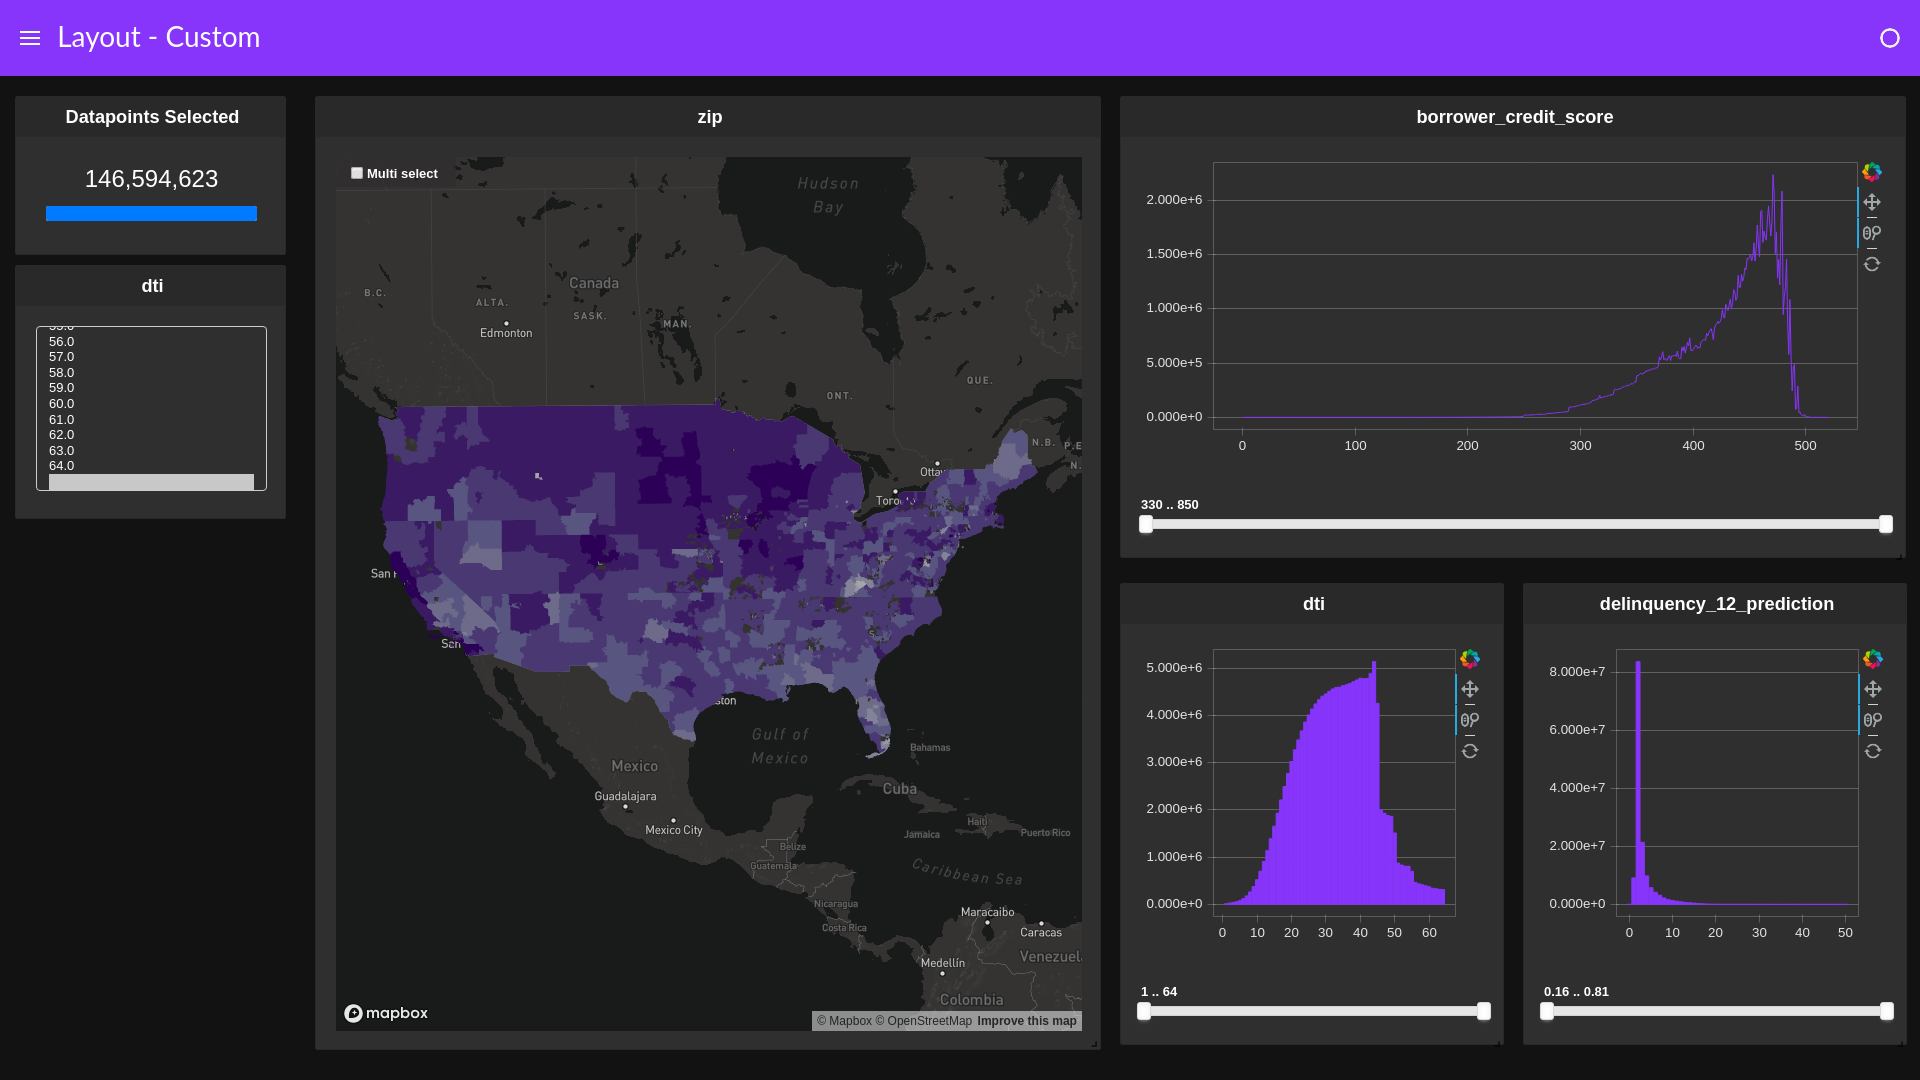

In [39]:
await d.preview()

## Predefined Layout Types

### 1. Single feature

<img src= './layout_thumbnails/single_feature.png' style="margin-left:35%" width=350px>

In [ ]:
d = cux_df.dashboard(charts_list, layout=cuxfilter.layouts.single_feature, theme=cuxfilter.themes.rapids, title="Layout - single feature")

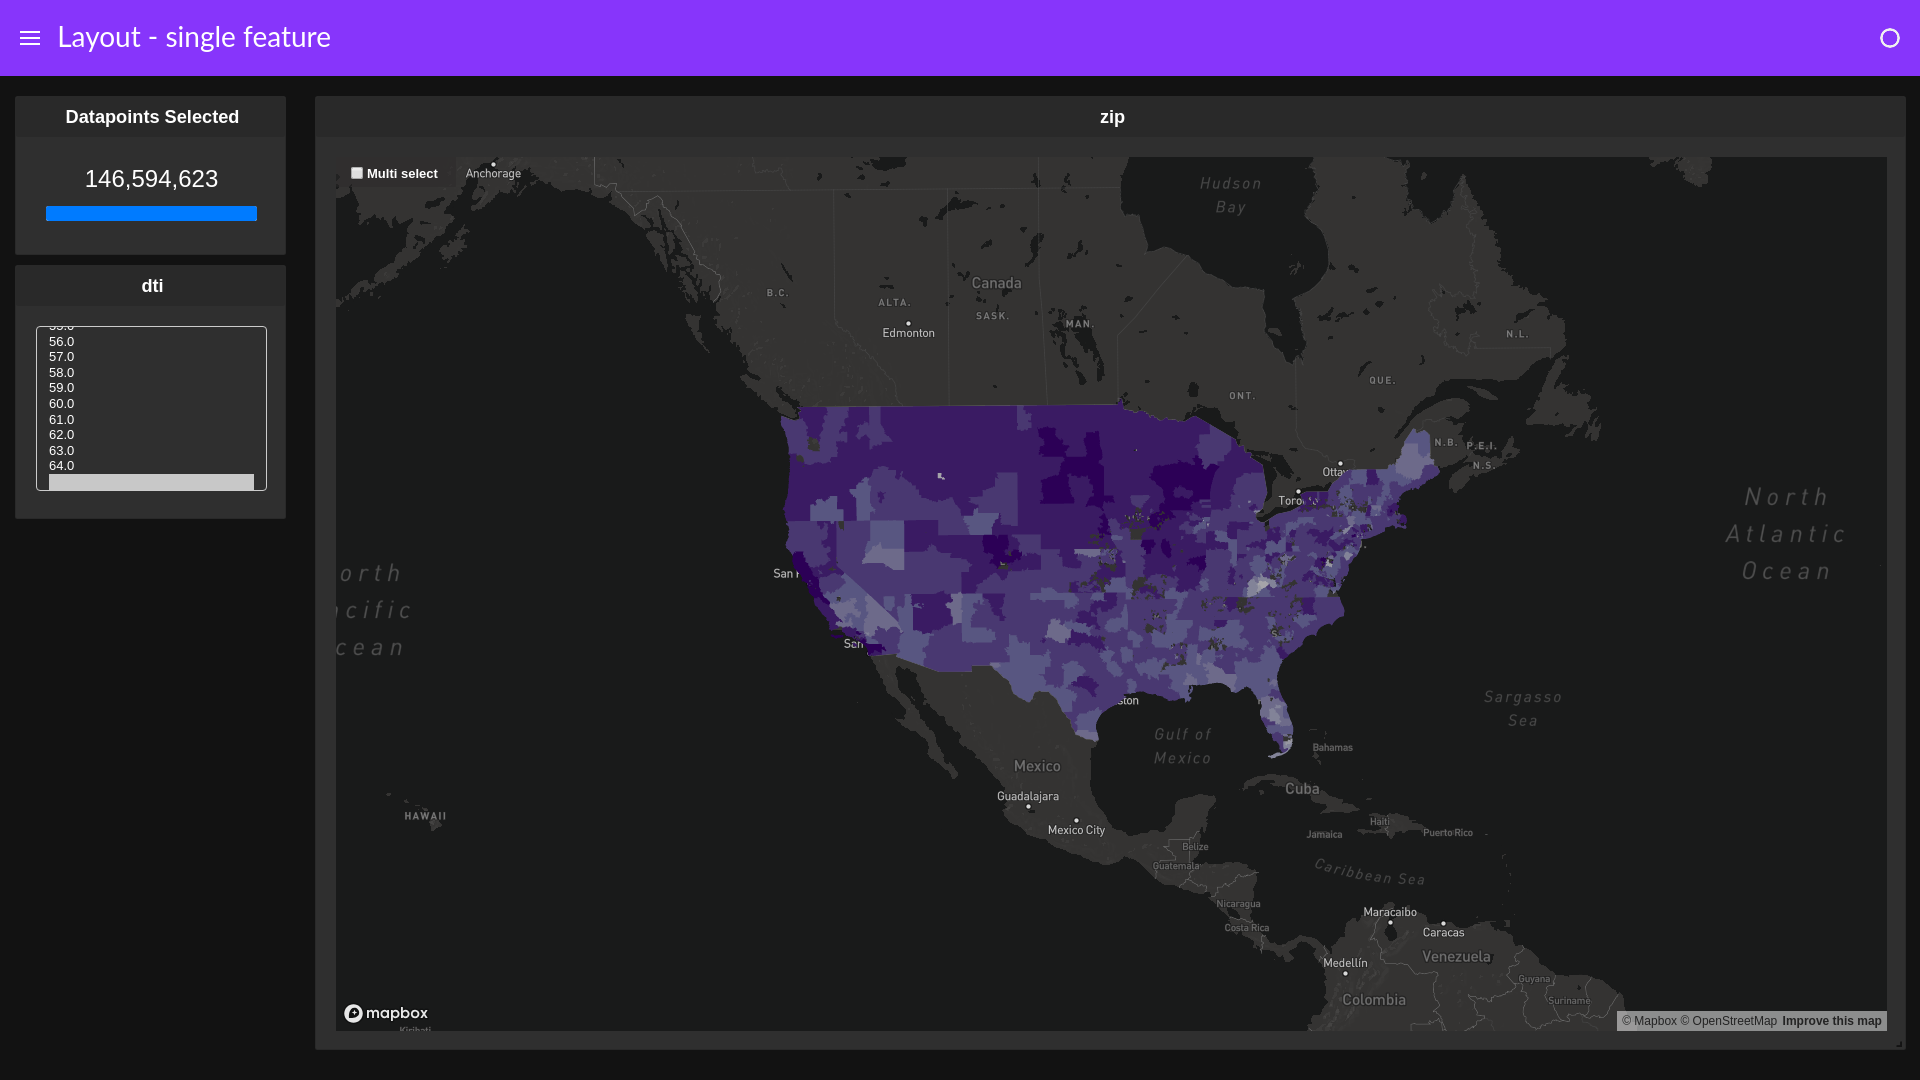

In [13]:
await d.preview()

### 2. Feature and base

<img src= './layout_thumbnails/feature_and_base.png' style="margin-left:35%" width=350px>

In [ ]:
d = cux_df.dashboard(charts_list, layout=cuxfilter.layouts.feature_and_base, theme=cuxfilter.themes.rapids, title="Layout - feature and base")

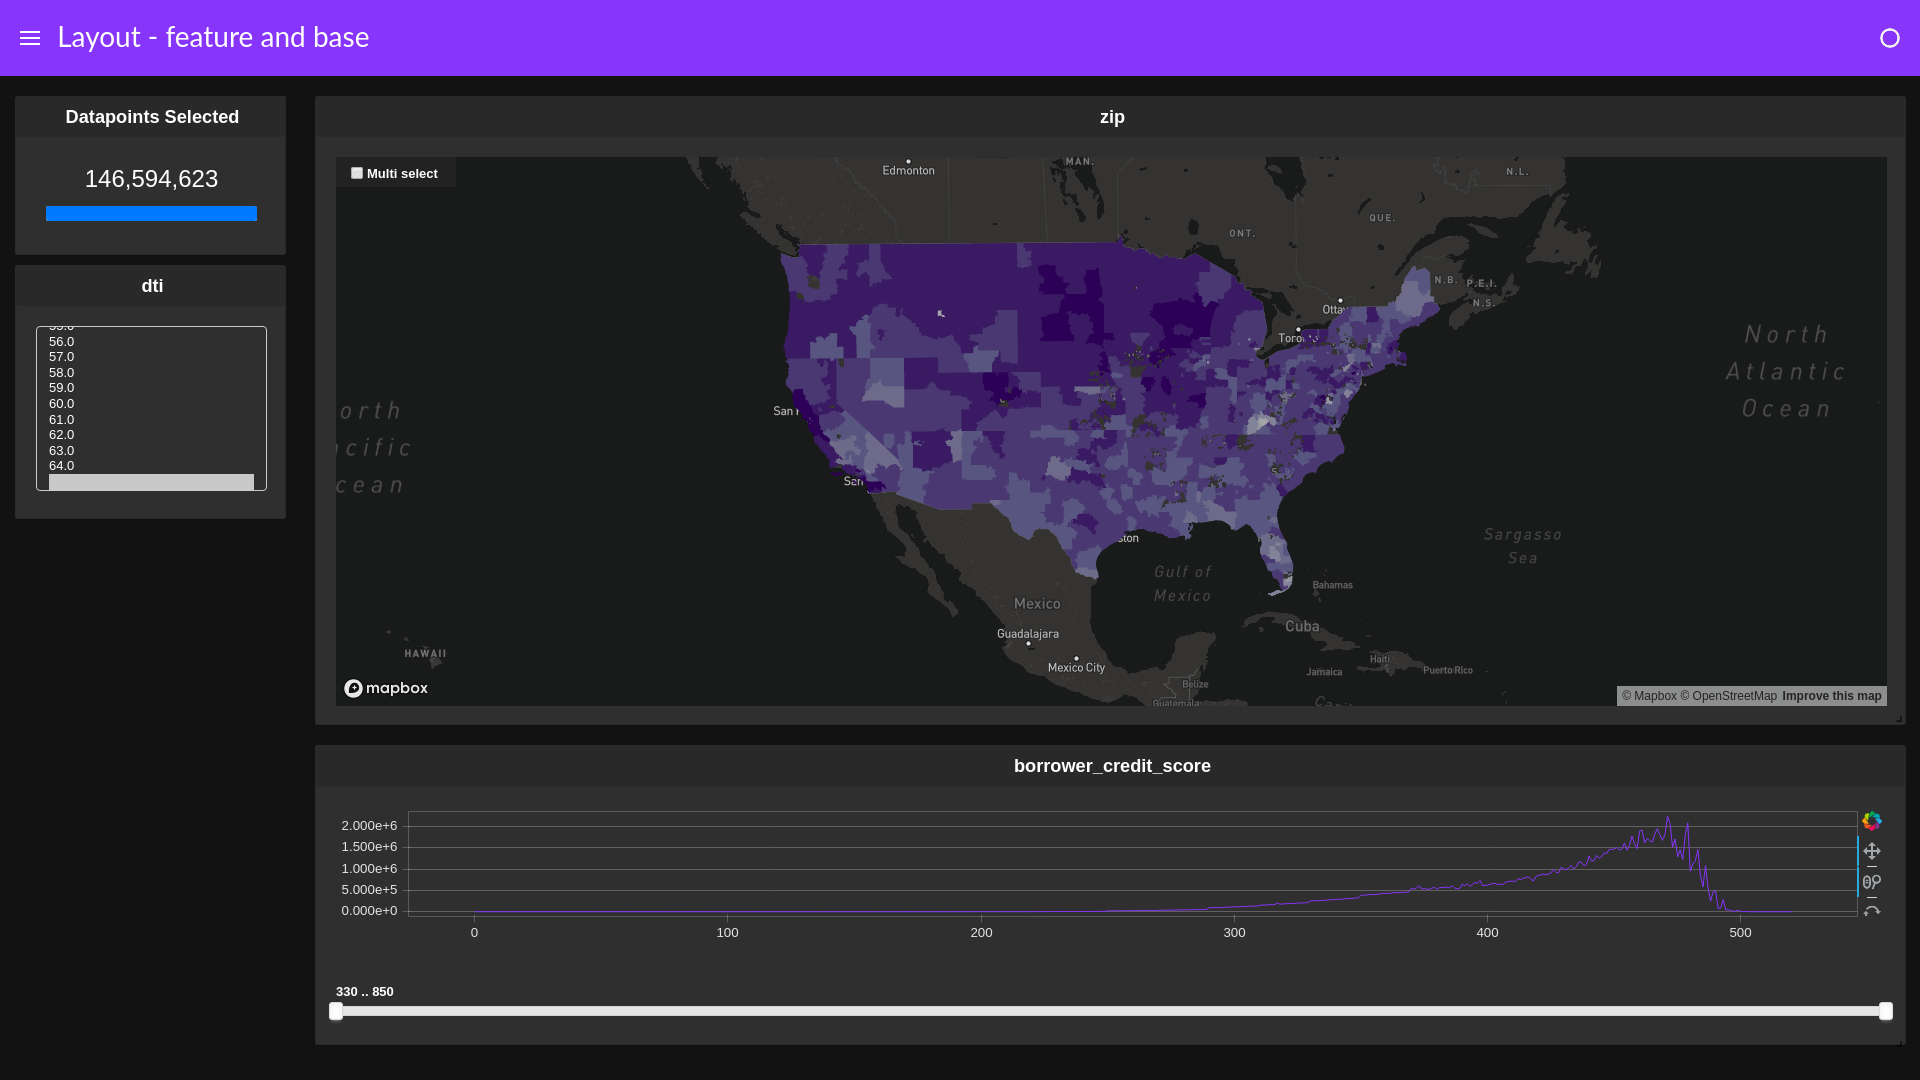

In [16]:
await d.preview()

### 3. Double feature

<img src= './layout_thumbnails/double_feature.png' style="margin-left:35%" width=350px>

In [ ]:
d = cux_df.dashboard([chart_widget, chart0, chart1], layout=cuxfilter.layouts.double_feature, theme=cuxfilter.themes.rapids, title="Layout - double feature")

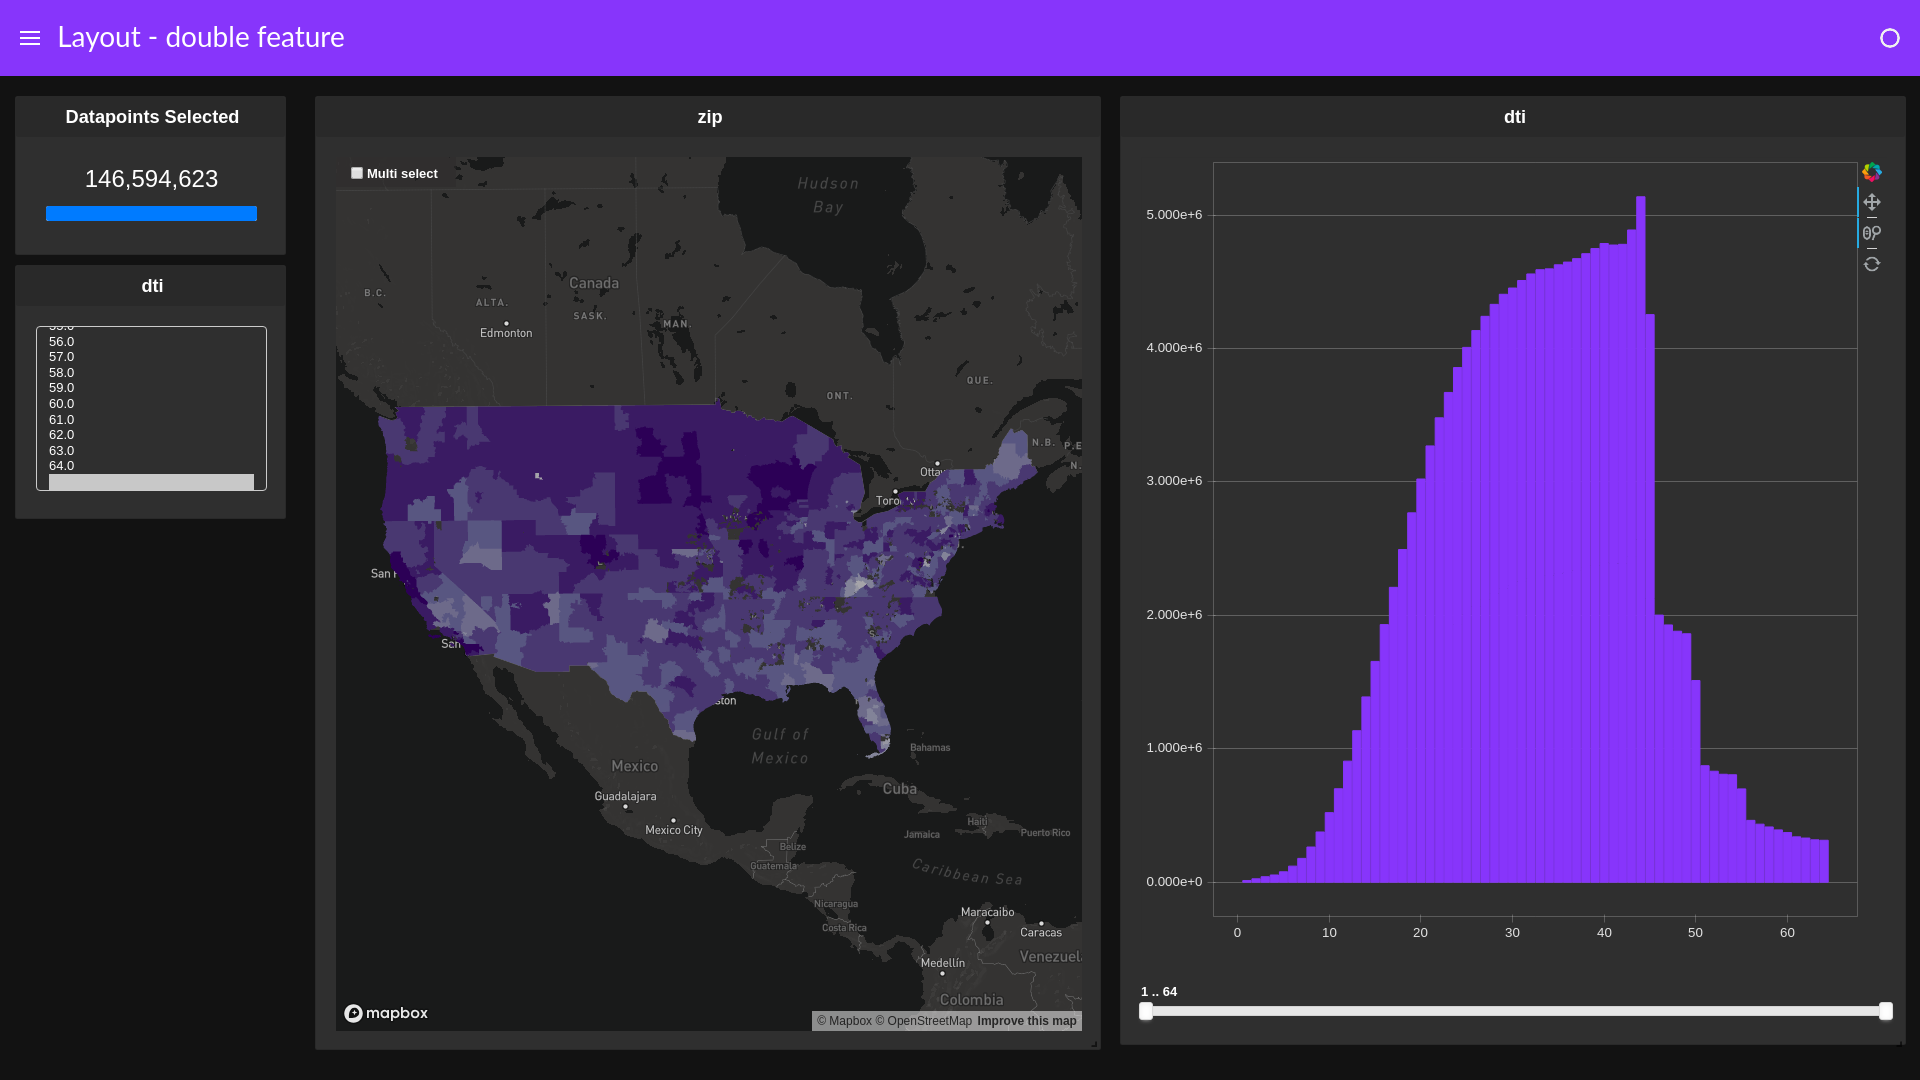

In [7]:
await d.preview()

### 4. Left feature right double

<img src= './layout_thumbnails/left_feature_right_double.png' style="margin-left:35%" width=350px>

In [ ]:
d = cux_df.dashboard(charts_list[:4], layout=cuxfilter.layouts.left_feature_right_double, theme=cuxfilter.themes.rapids, title="Layout - left feature right double")

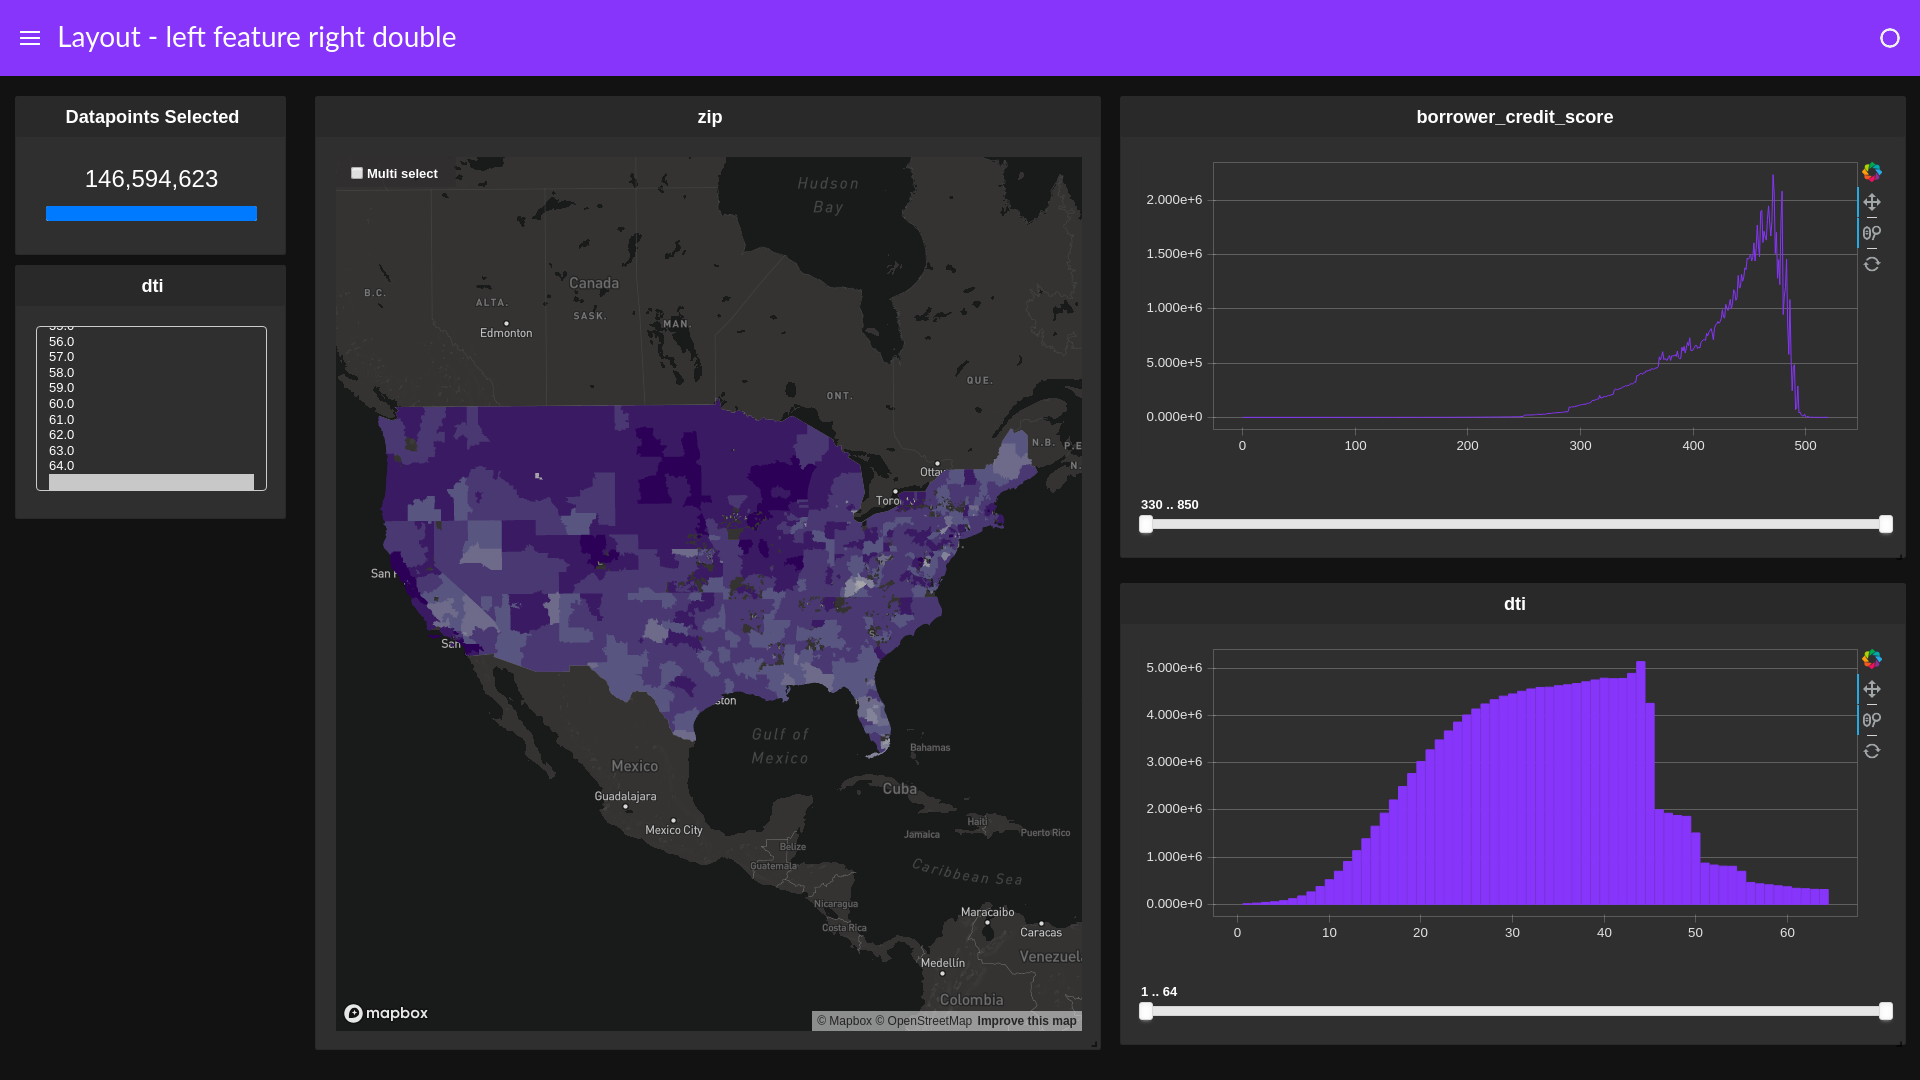

In [10]:
await d.preview()

### 5. Triple feature

<img src= './layout_thumbnails/triple_feature.png' style="margin-left:35%" width=350px>

In [ ]:
d = cux_df.dashboard([chart_widget, chart1, chart2, chart3], layout=cuxfilter.layouts.triple_feature, theme=cuxfilter.themes.rapids, title="Layout - triple feature")

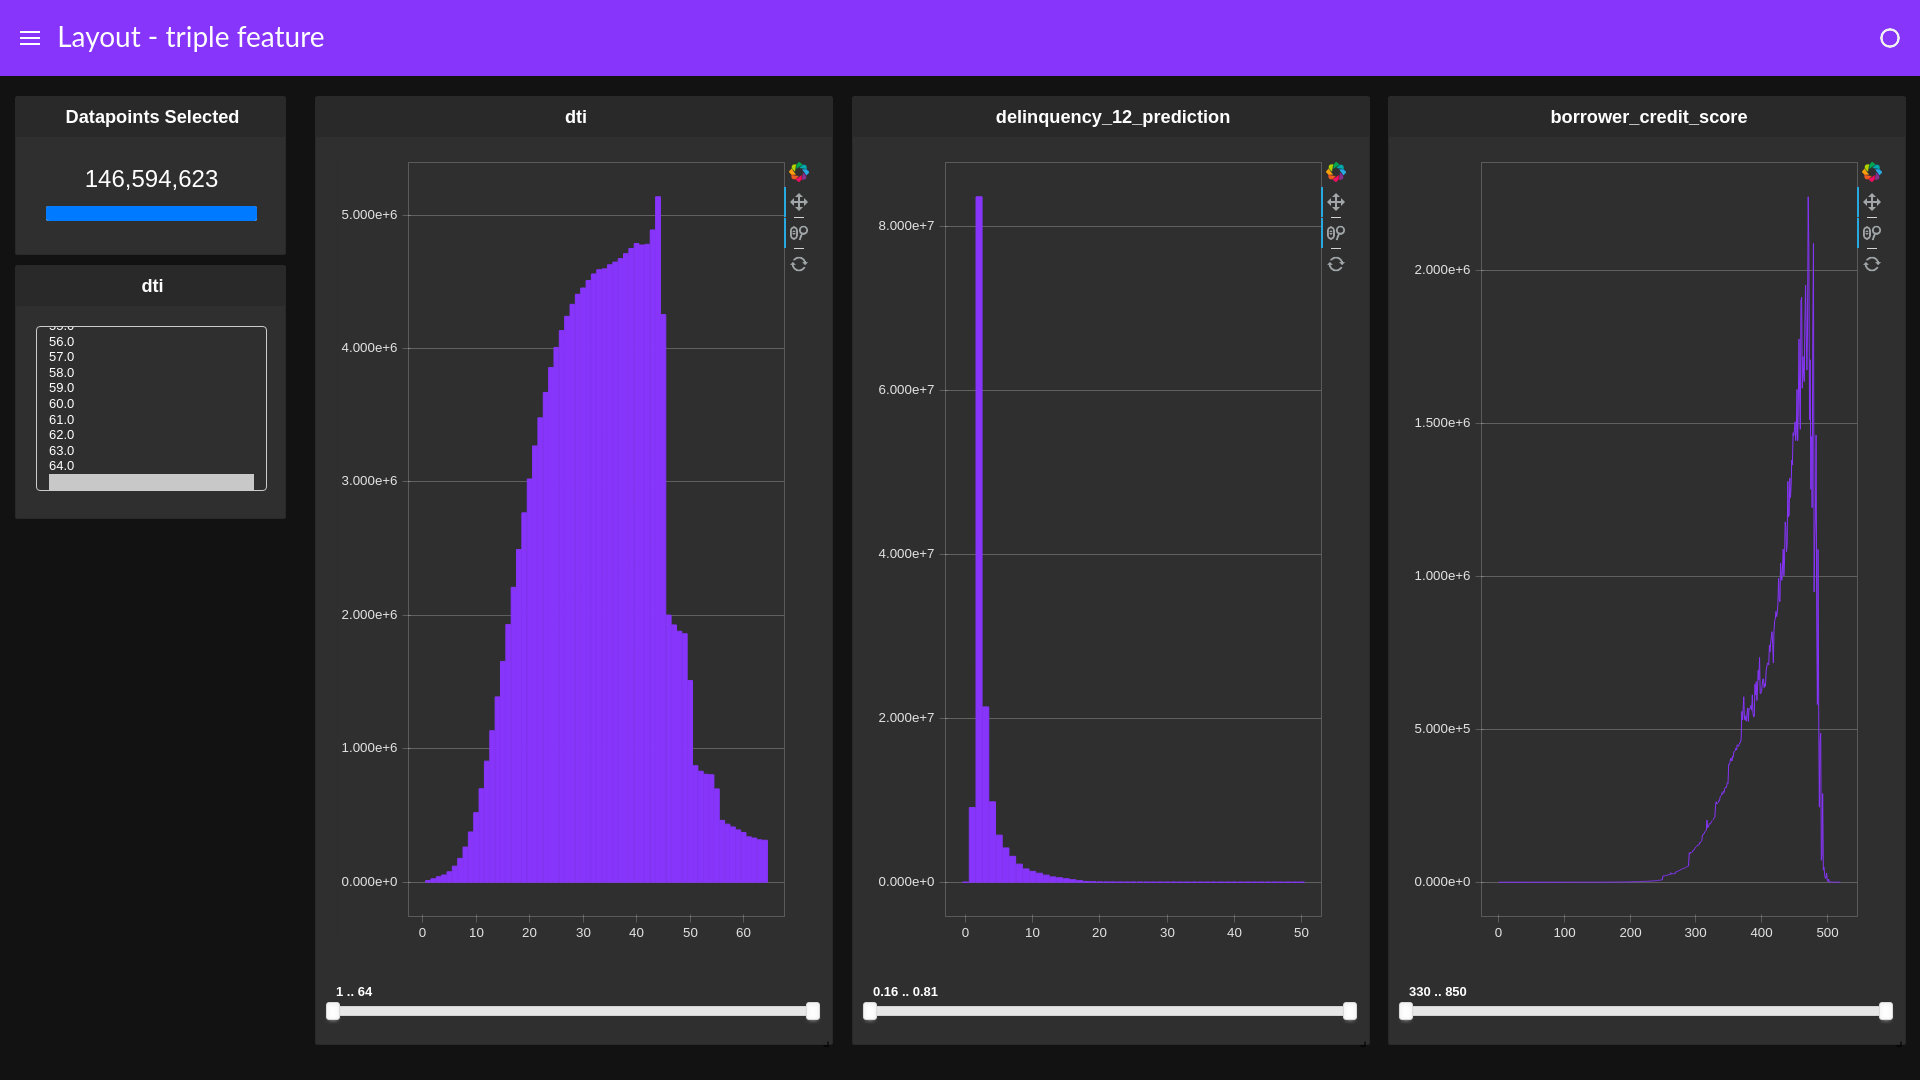

In [22]:
await d.preview()

### 6. Feature and double base

<img src= './layout_thumbnails/feature_and_double_base.png' style="margin-left:35%" width=350px>

In [ ]:
d = cux_df.dashboard([chart_widget, chart0, chart2, chart3], layout=cuxfilter.layouts.feature_and_double_base, theme=cuxfilter.themes.rapids, title="Layout - feature and double base")

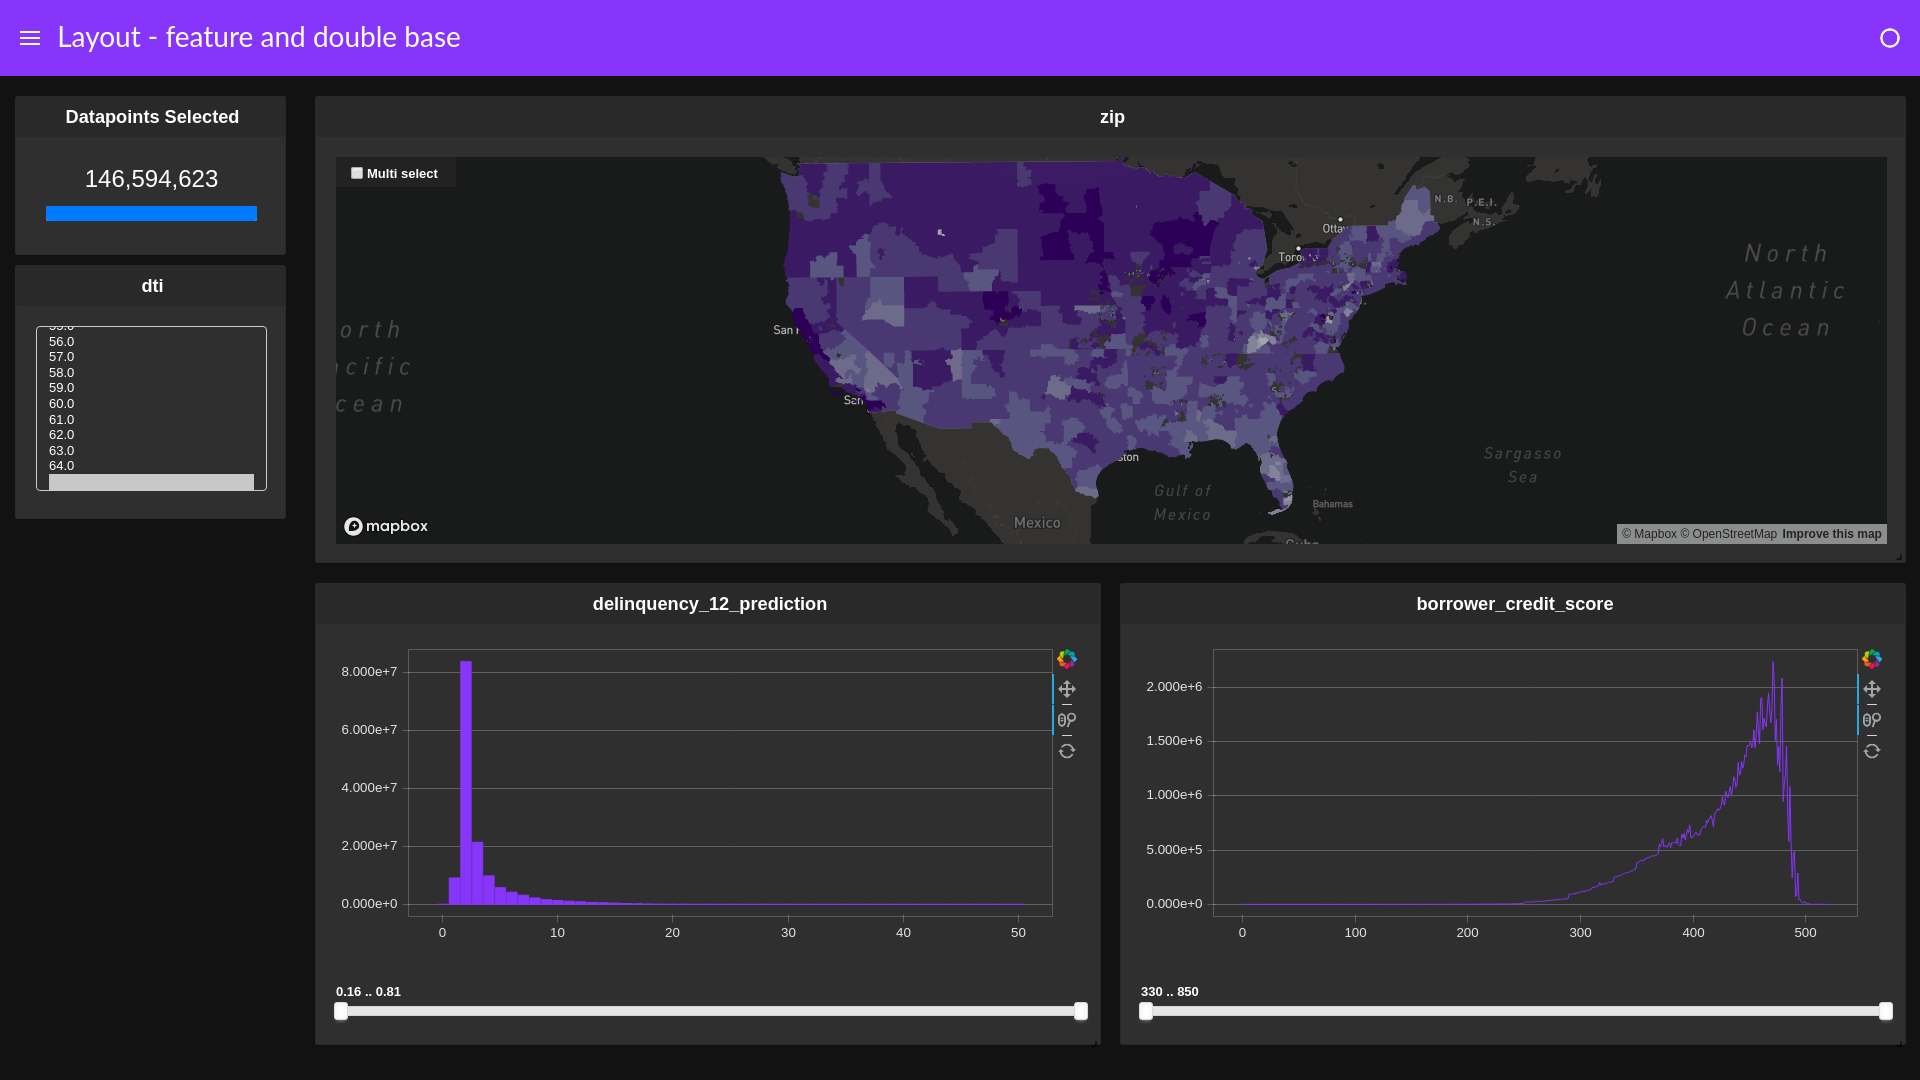

In [13]:
await d.preview()

### 7. Two by two

<img src= './layout_thumbnails/two_by_two.png' style="margin-left:35%" width=350px>

In [ ]:
d = cux_df.dashboard([chart_widget, chart0, chart2, chart3, chart4], layout=cuxfilter.layouts.two_by_two, theme=cuxfilter.themes.rapids, title="Layout - two by two")

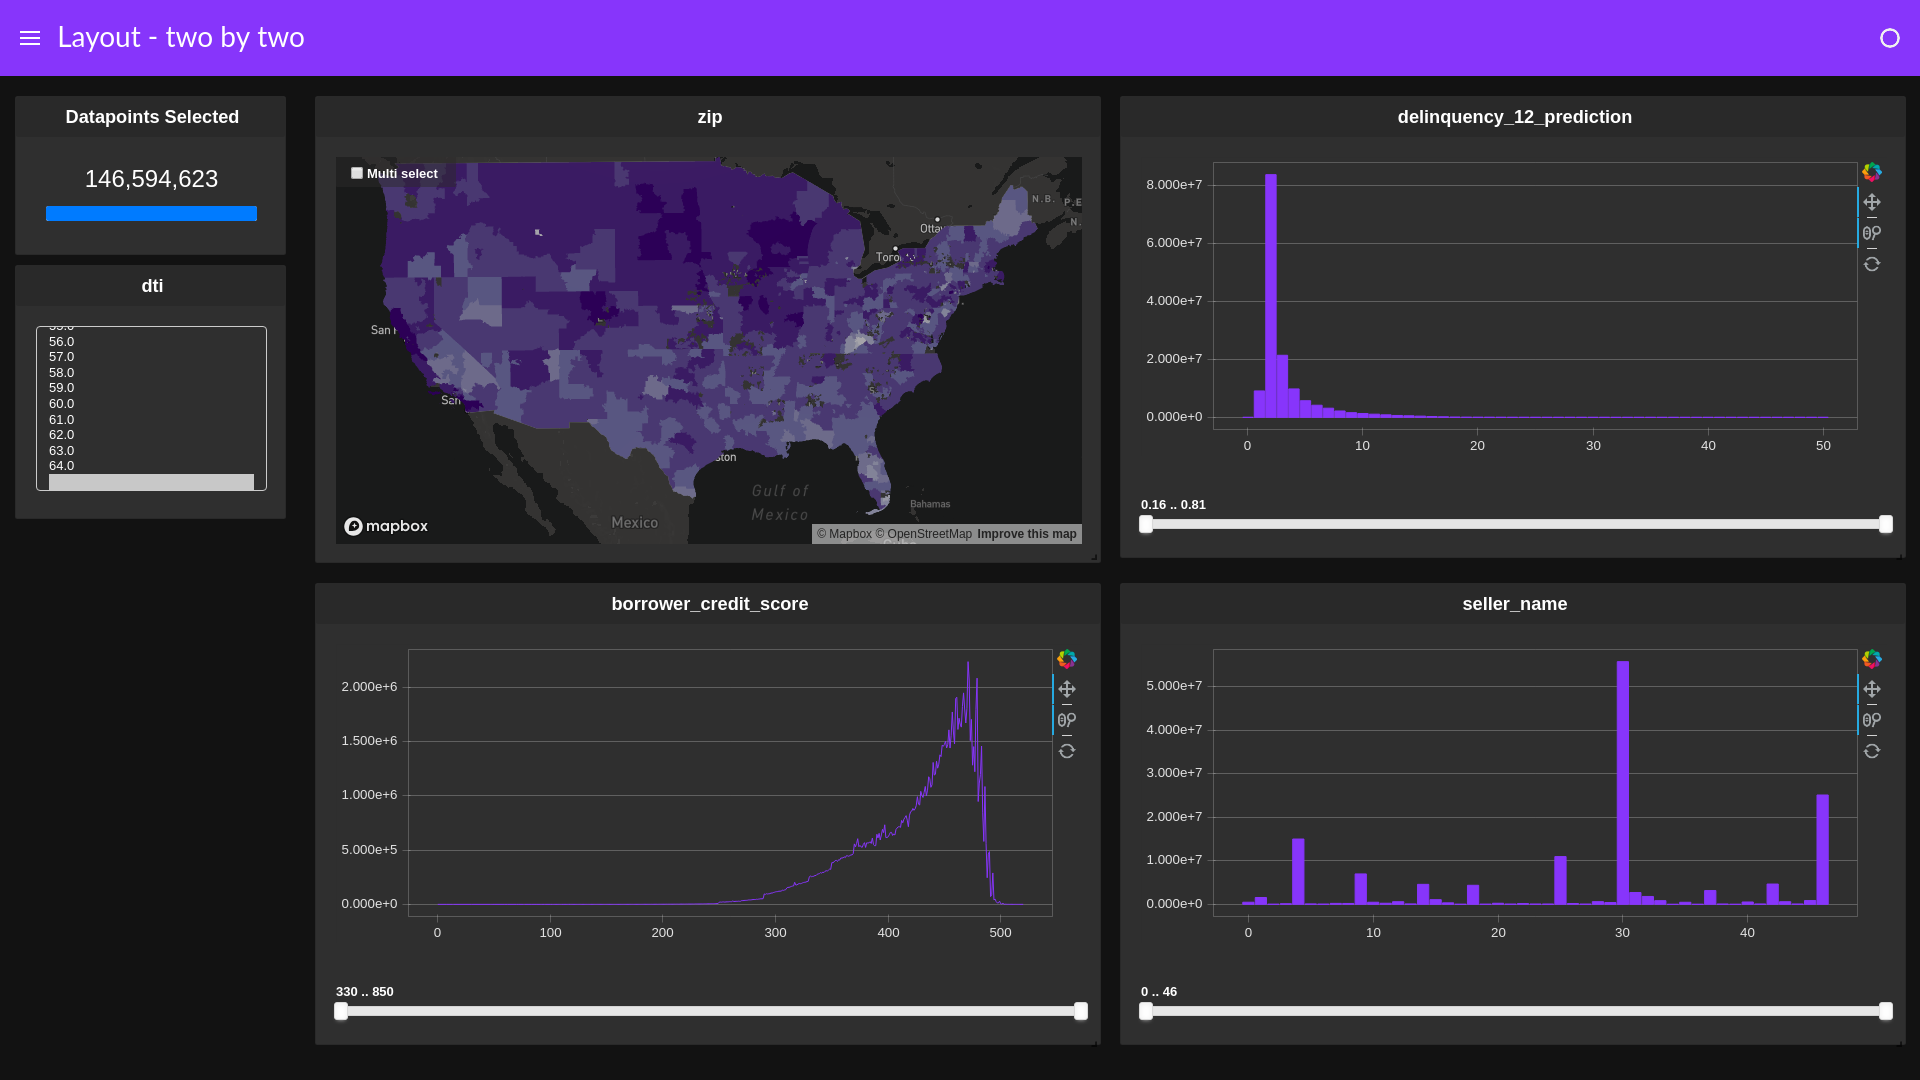

In [16]:
await d.preview()

### 8. Feature and triple base

<img src= './layout_thumbnails/feature_and_triple_base.png' style="margin-left:35%" width=350px>

In [ ]:
d = cux_df.dashboard(charts_list, layout=cuxfilter.layouts.feature_and_triple_base, theme=cuxfilter.themes.rapids, title="Layout - feature and triple base")

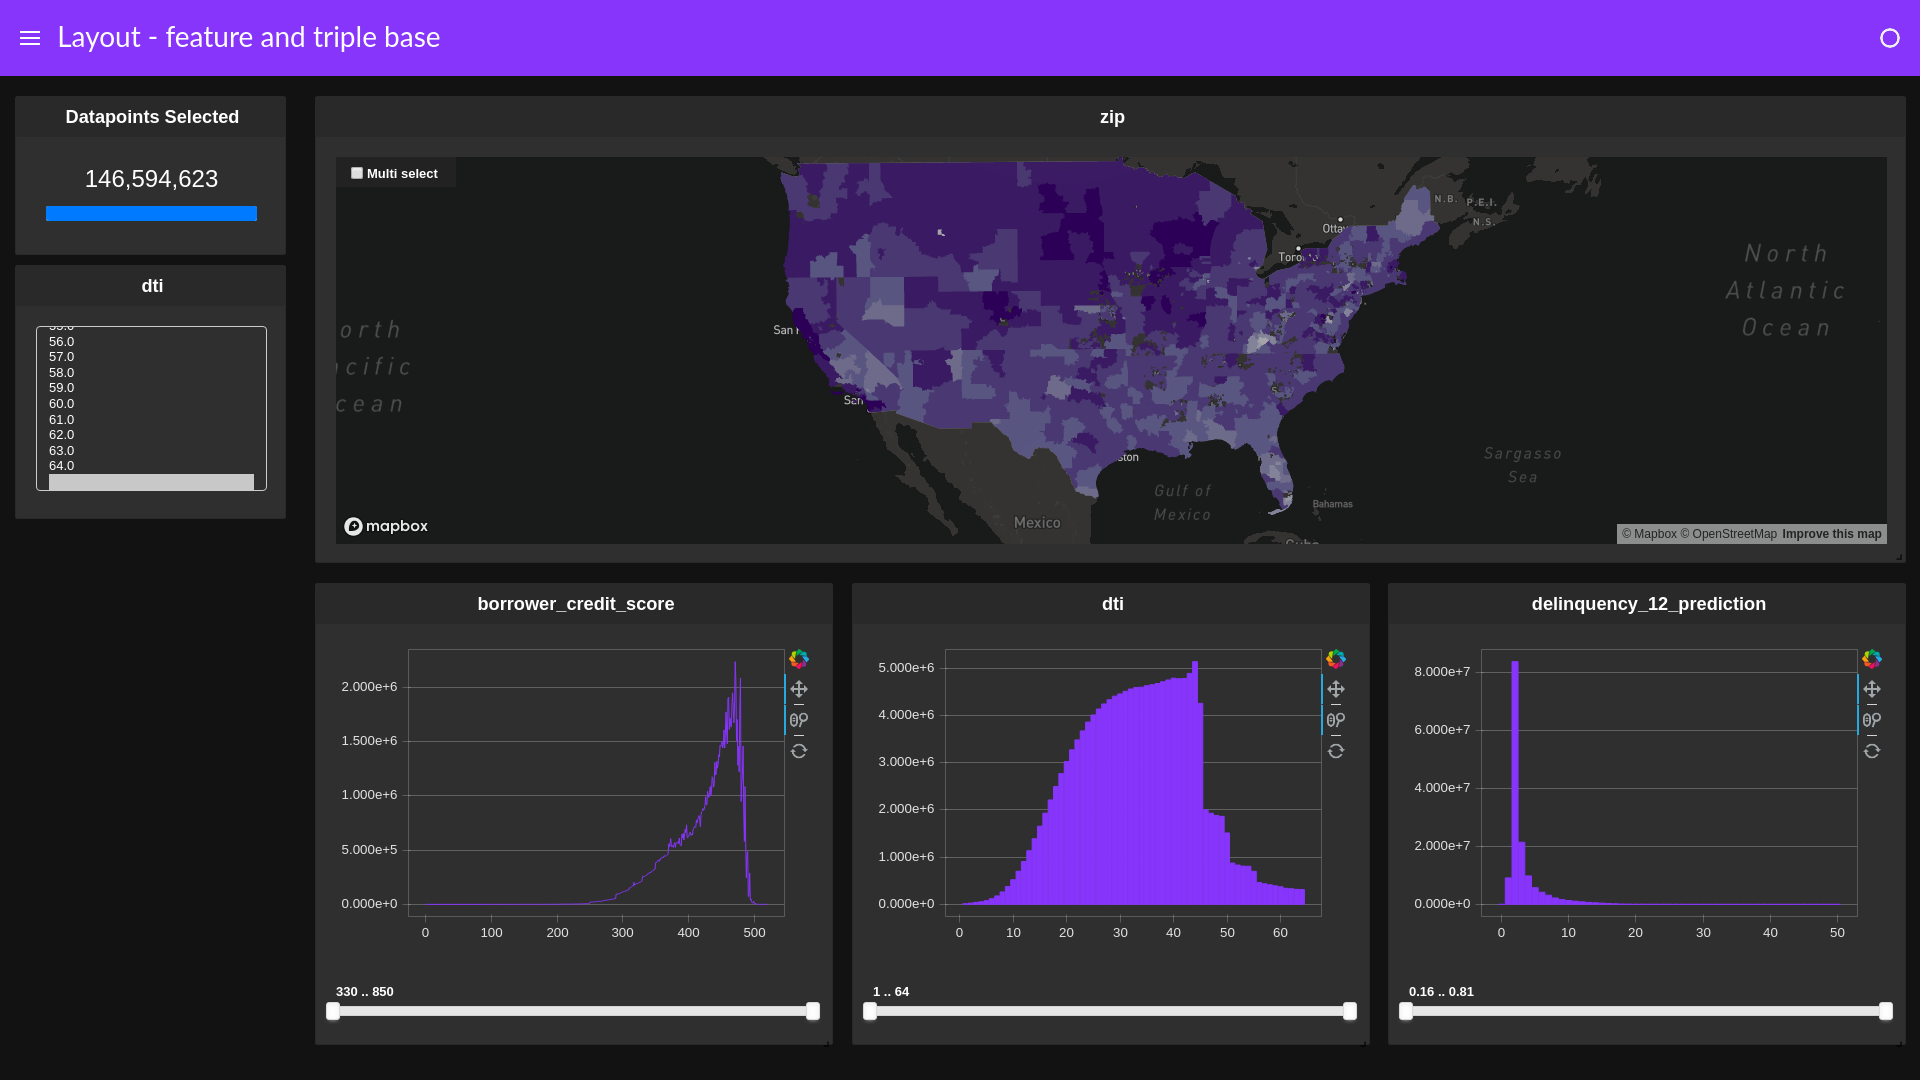

In [19]:
await d.preview()

### 9. Feature and quad base

<img src= './layout_thumbnails/feature_and_quad_base.png' style="margin-left:35%" width=350px>

In [ ]:
d = cux_df.dashboard(charts_list, layout=cuxfilter.layouts.feature_and_quad_base, theme=cuxfilter.themes.rapids, title="Layout - feature and quad base")

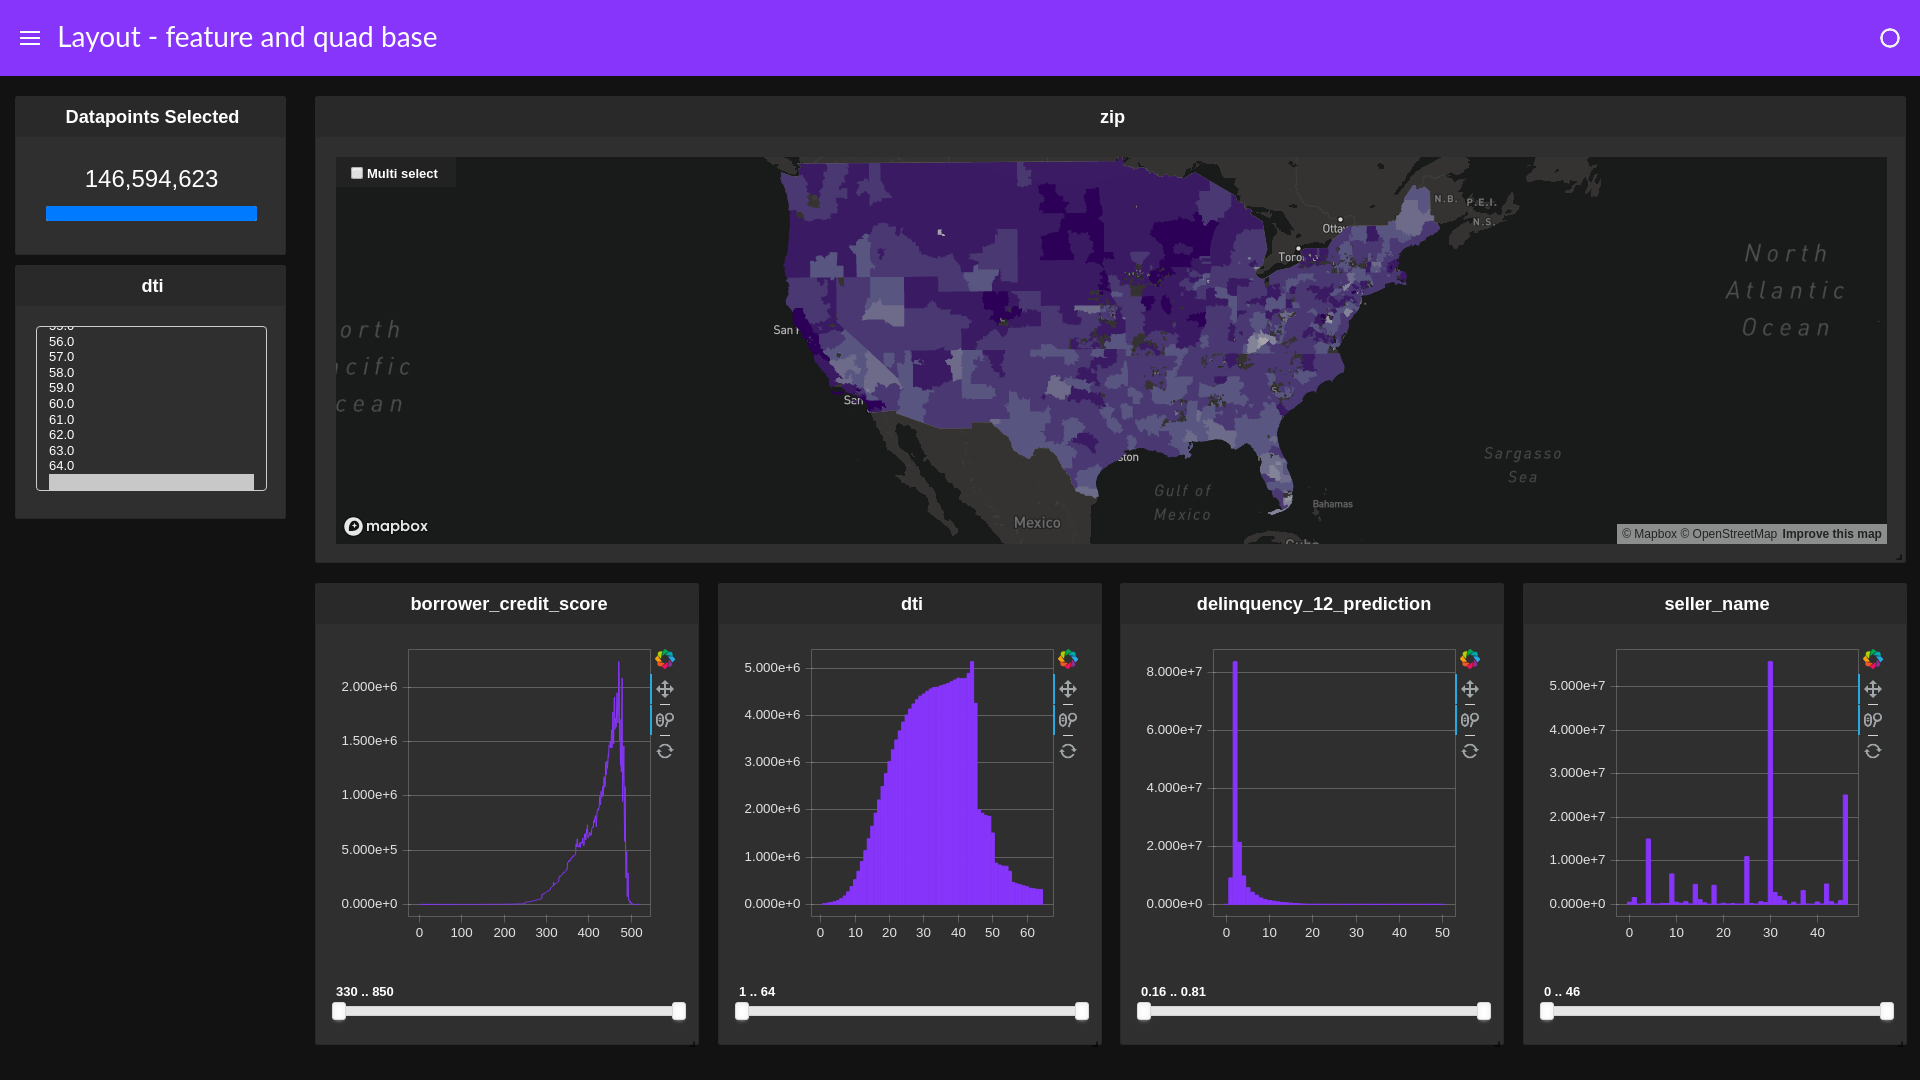

In [22]:
await d.preview()

### 10. Feature and five edge

<img src= './layout_thumbnails/feature_and_five_edge.png' style="margin-left:35%" width=350px>

In [ ]:
d = cux_df.dashboard(charts_list, layout=cuxfilter.layouts.feature_and_five_edge, theme=cuxfilter.themes.rapids, title="Layout - feature and five edge")

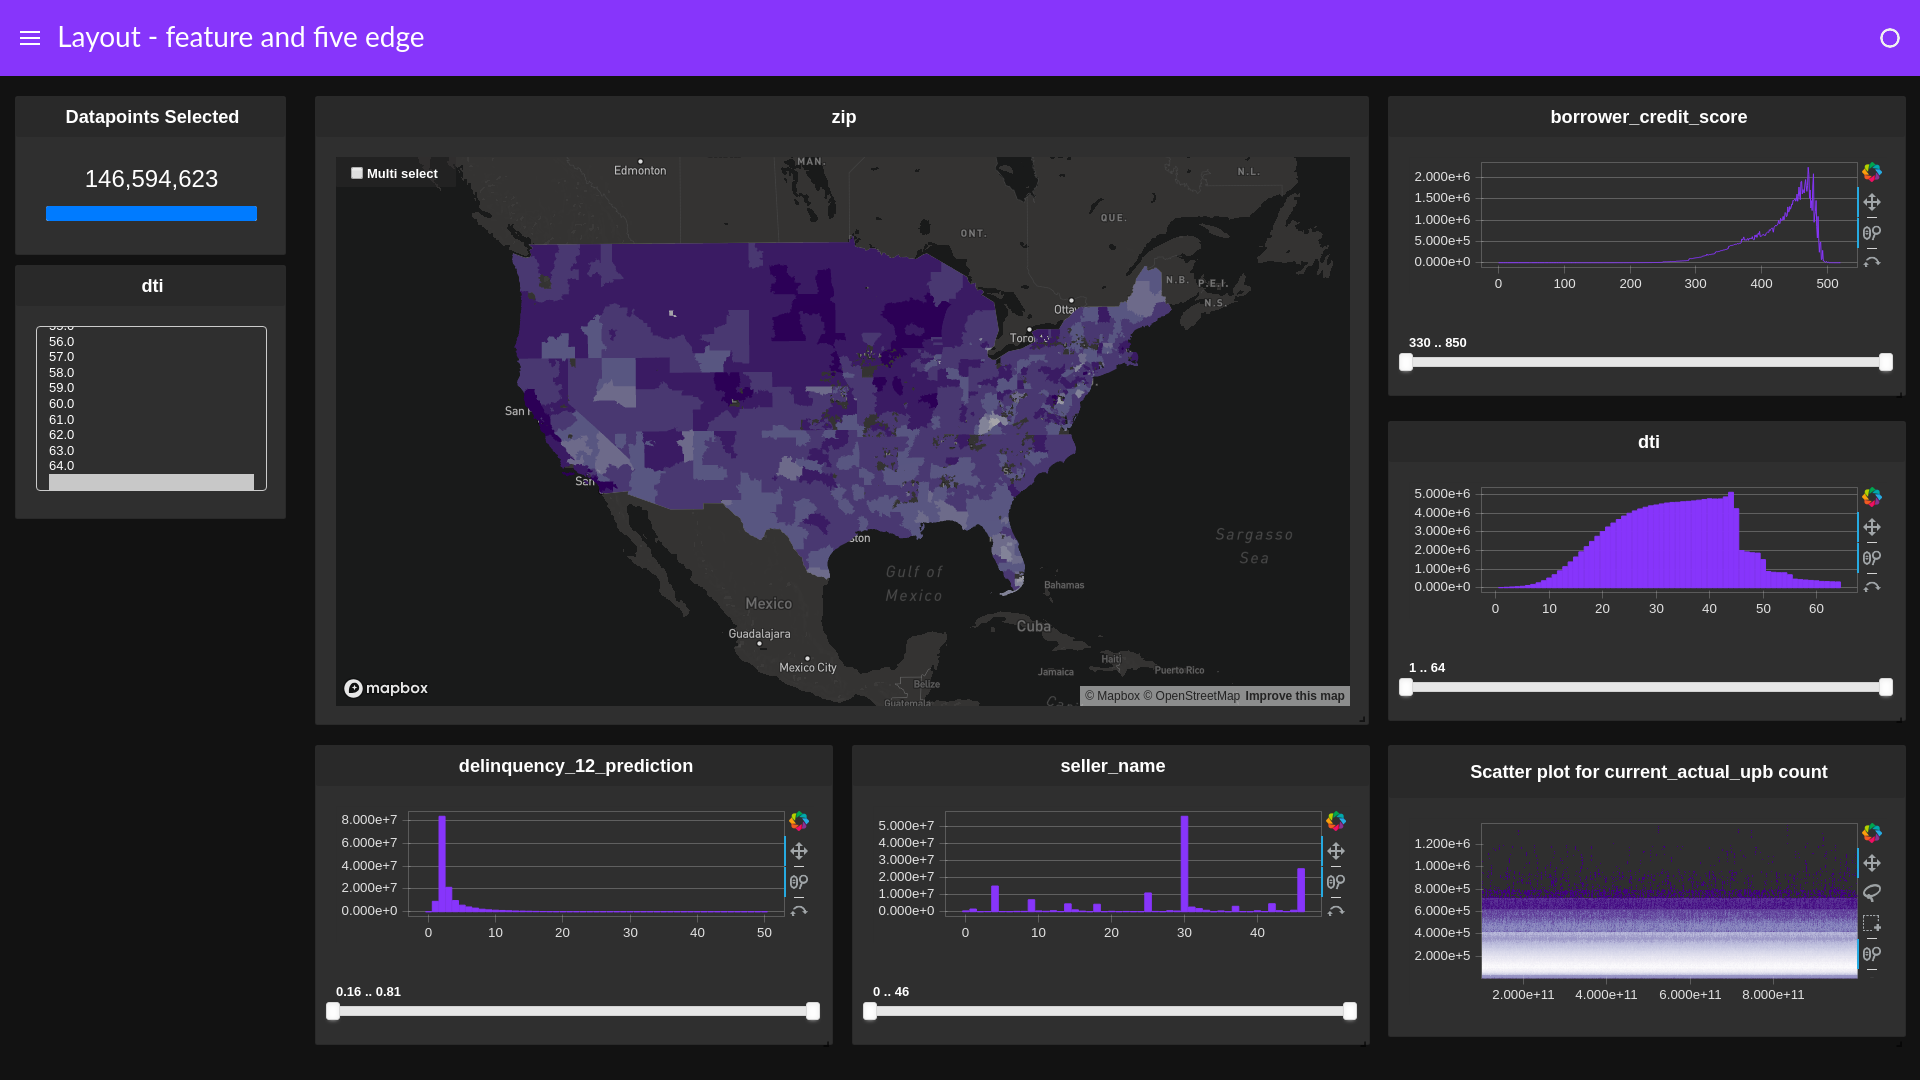

In [25]:
await d.preview()

### 11. Two by three

<img src= './layout_thumbnails/two_by_three.png' style="margin-left:35%" width=350px>

In [ ]:
d = cux_df.dashboard([chart_widget, chart3, chart1, chart2, chart4, chart5, chart6], layout=cuxfilter.layouts.two_by_three, theme=cuxfilter.themes.rapids, title="Layout - two by three")

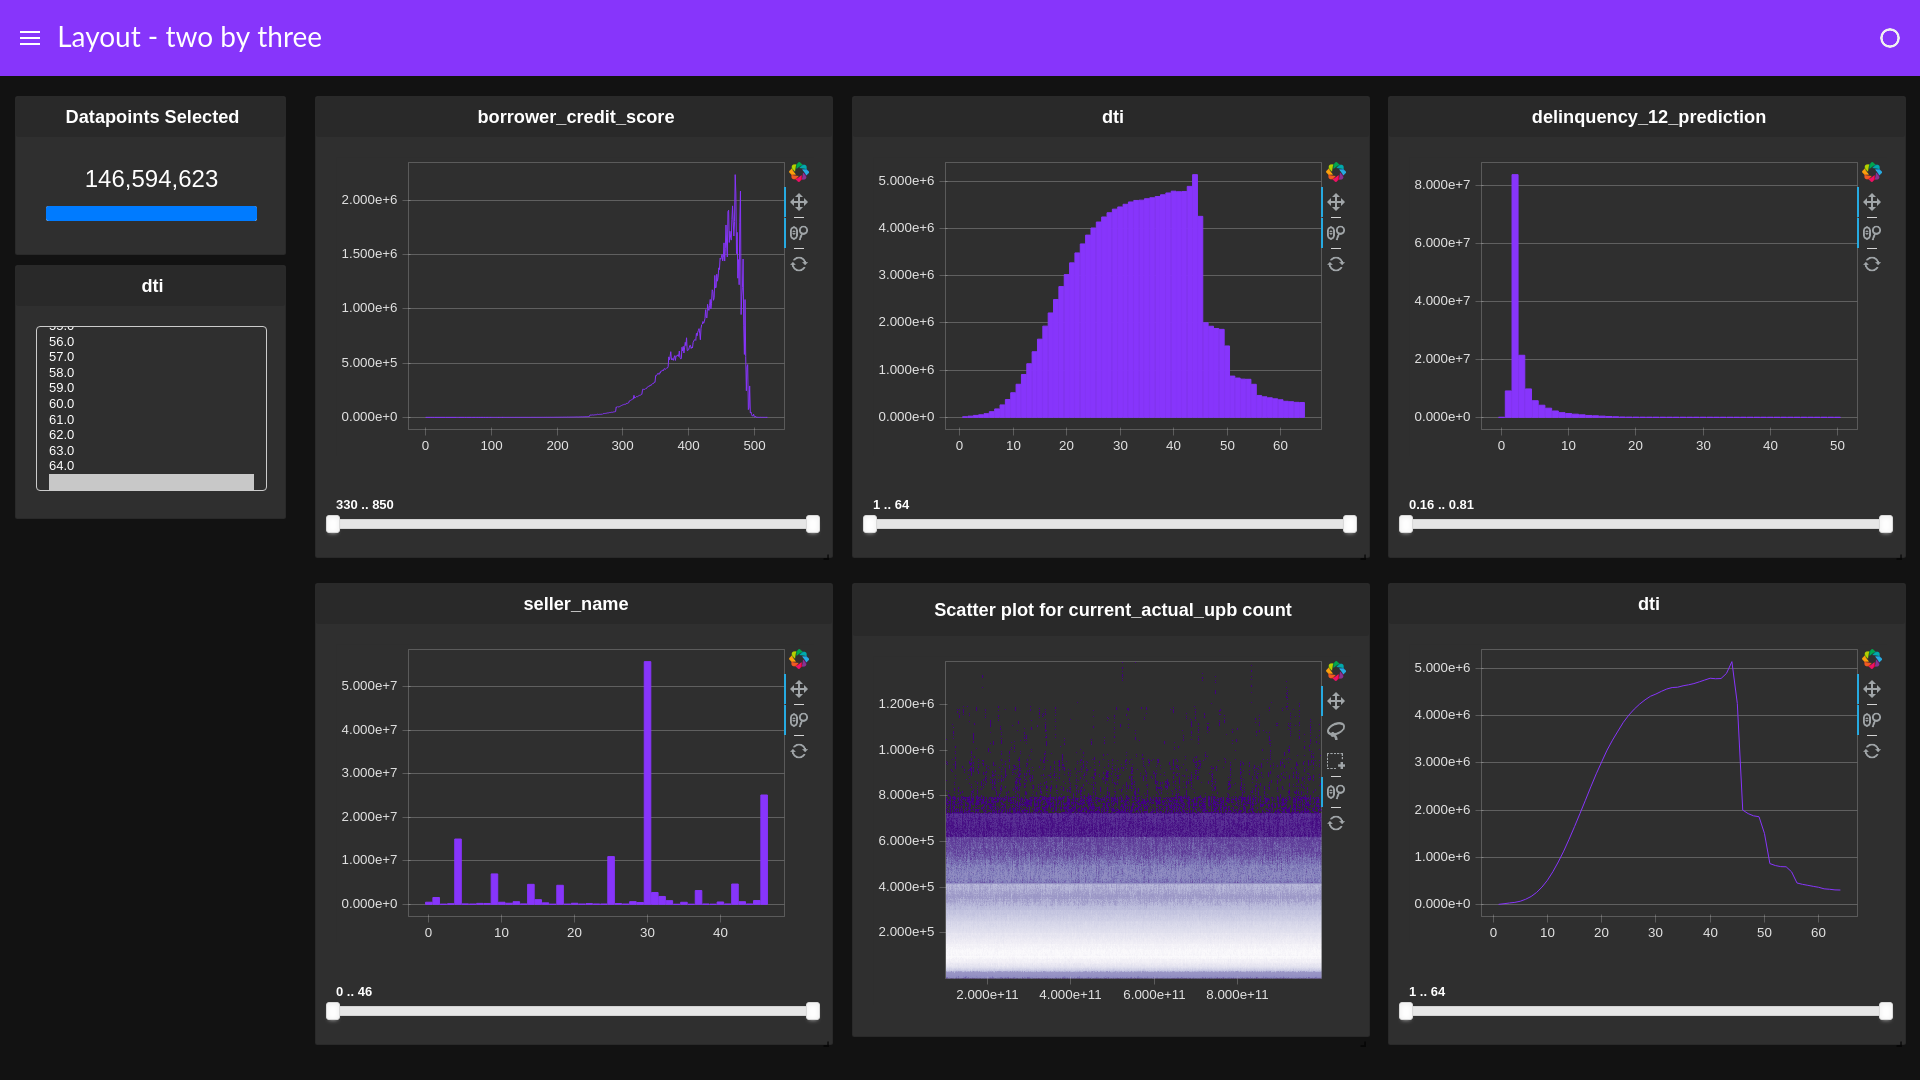

In [34]:
await d.preview()

### 12. Double feature quad base

<img src= './layout_thumbnails/double_feature_quad_base.png' style="margin-left:35%" width=350px>

In [ ]:
d = cux_df.dashboard(charts_list, layout=cuxfilter.layouts.double_feature_quad_base, 
                     theme=cuxfilter.themes.rapids, title="Layout - double feature quad base")

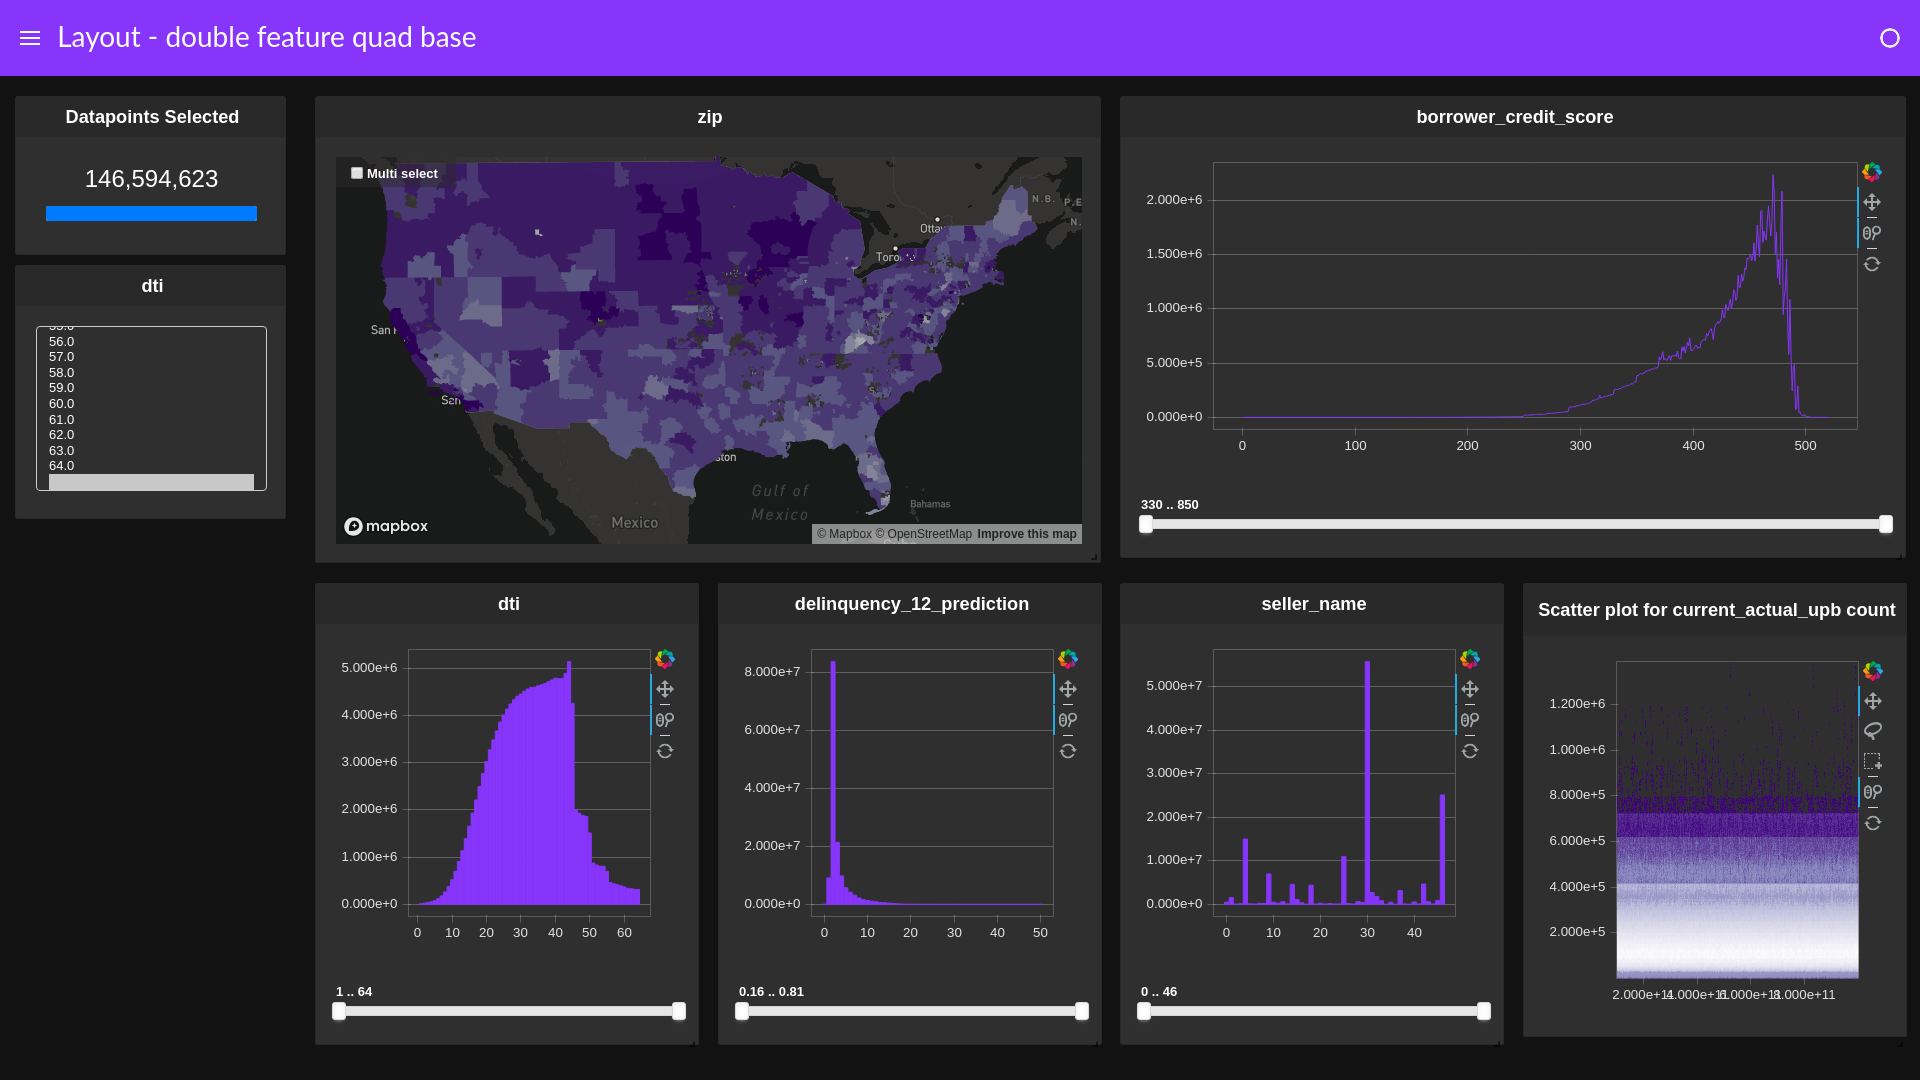

In [28]:
await d.preview()

### 13. Three by three

<img src= './layout_thumbnails/three_by_three.png' style="margin-left:35%" width=350px>

In [ ]:
d = cux_df.dashboard(charts_list, layout=cuxfilter.layouts.three_by_three, 
                     theme=cuxfilter.themes.rapids, title="Layout - three by three")

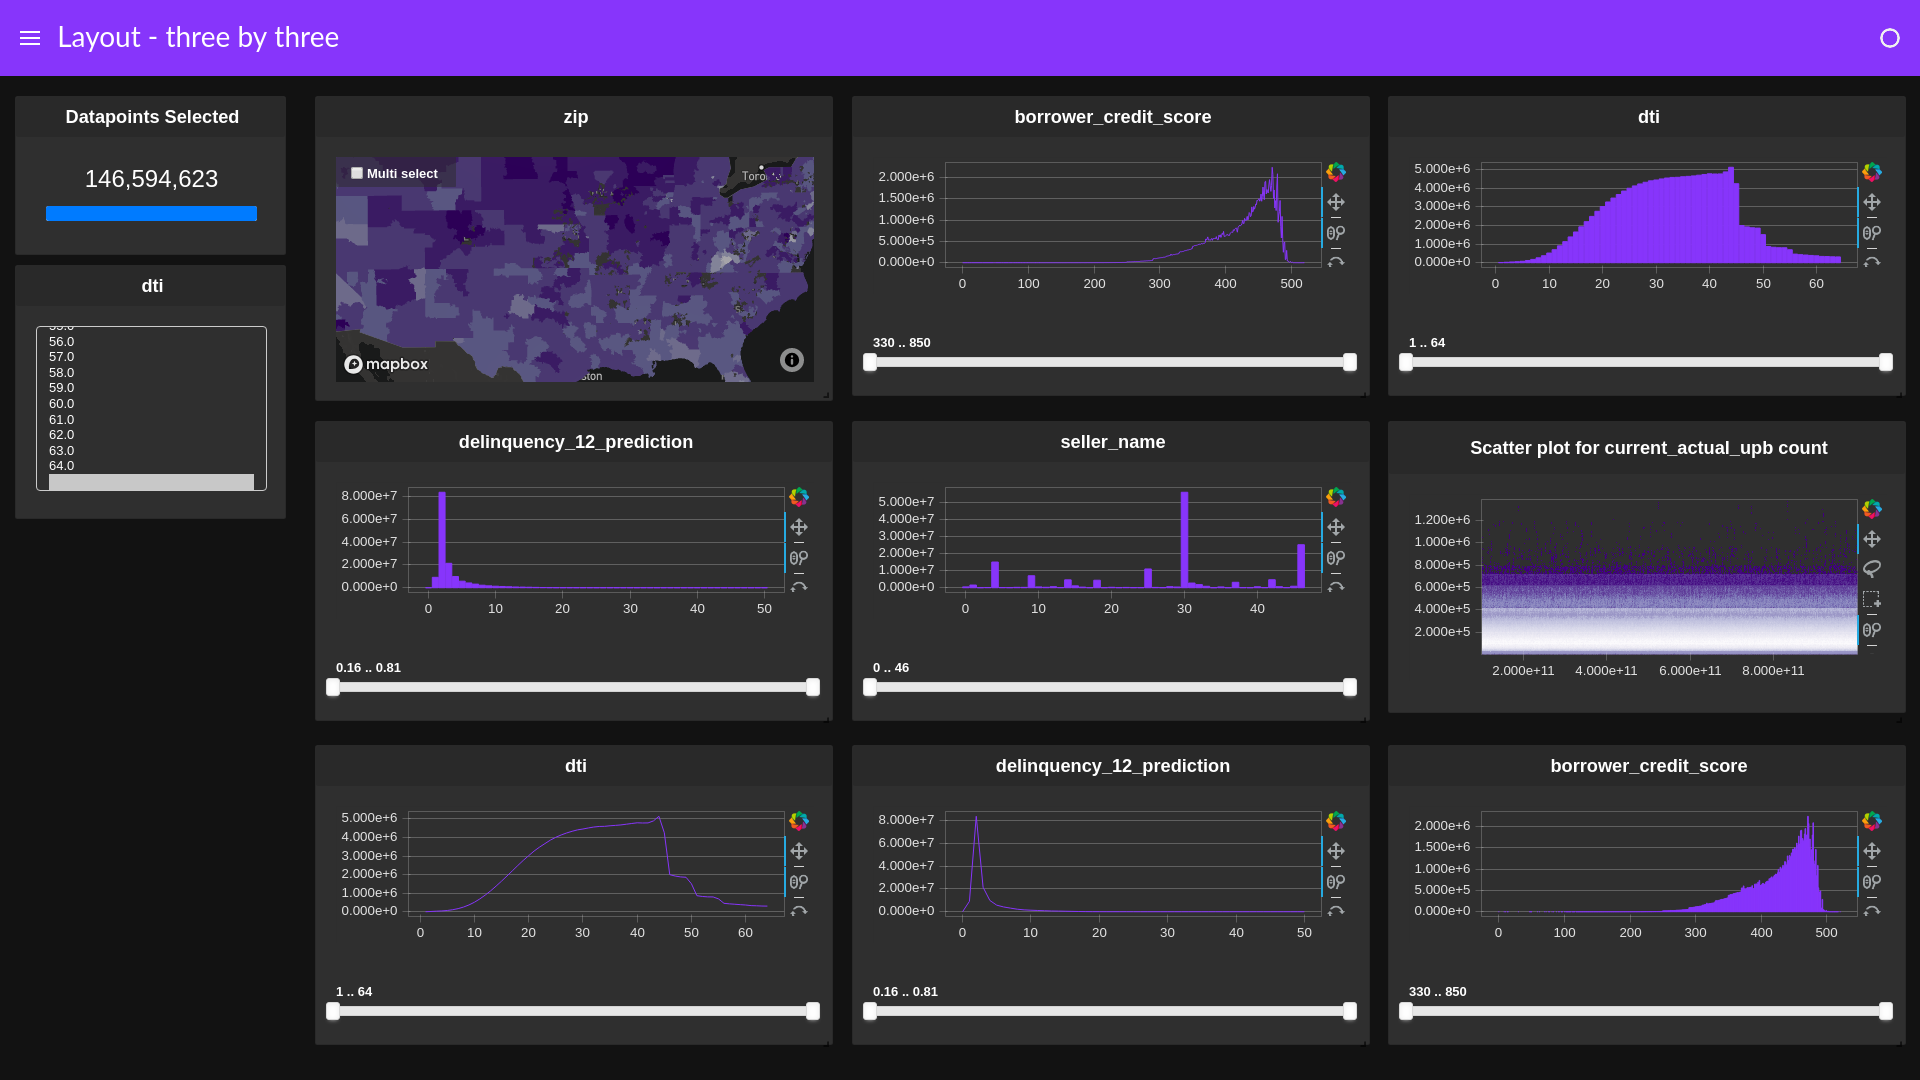

In [31]:
await d.preview()